# Seaborn 🌊
- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존함
- 공식 문서 : https://seaborn.pydata.org/
- seaborn dataset 미리보기 :
    https://github.com/mwaskom/seaborn-data

In [ ]:
%pip install seaborn


[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글폰트(나눔) 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#실행 후 런타임 재시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,599 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121730 files and dire

In [ ]:
# 한글폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 음수(-)기호 지원 설정
print(plt.rcParams['font.family'])

['NanumBarunGothic']


### 1차원 분포 플롯
- 1차원 데이터는 실수 값이면 히스토그램과 같은 실수 분포 플롯으로 나타내고 카테고리 값이면 카운트 플롯으로 나타낸다.
- 연속형 자료, 범주형 자료

In [ ]:
# 샘플 데이터 로드
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

#### 1차원 실수 분포 플롯
- 실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로 Matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등을 제공
- 1차원 실수 분포 플롯 명령에는 rugplot, kdeplot, distplot이 있다.

- rugplot은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.

rugplot: http://seaborn.pydata.org/generated/seaborn.rugplot.html

In [ ]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

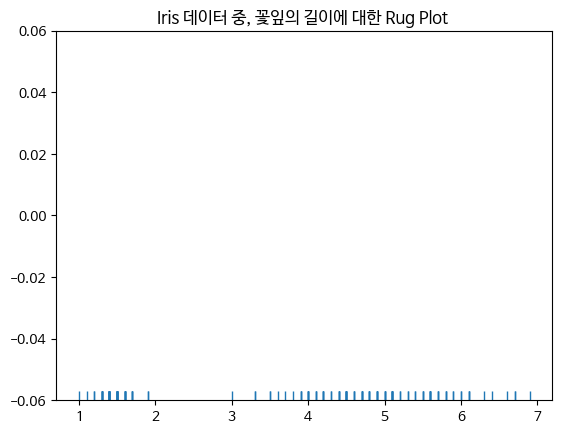

In [ ]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

- 커널 밀도(kernel density) : 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법
- kdeplot: http://seaborn.pydata.org/generated/seaborn.kdeplot.html
- 커널 밀도 추정에 대한 자세한 내용은 scikit-learn 패키지를 참조한다.
- http://scikit-learn.org/stable/modules/density.html

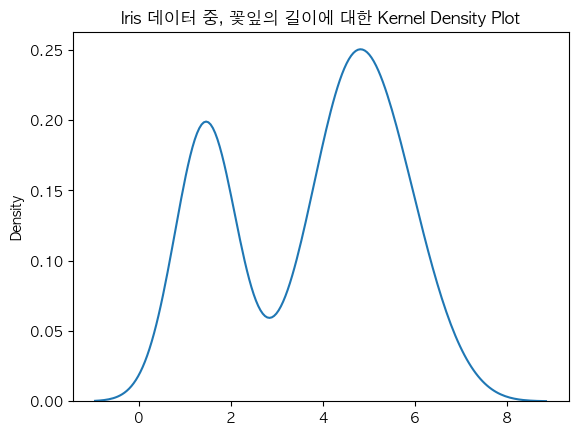

In [ ]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

Seaborn의 distplot 명령은 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용된다.

displot : https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

distplot(deprecated): http://seaborn.pydata.org/generated/seaborn.distplot.html

/var/folders/hx/w1bkm33d5wn9h84_4pjrr6_h0000gn/T/ipykernel_5256/2128180943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=True, rug=True)


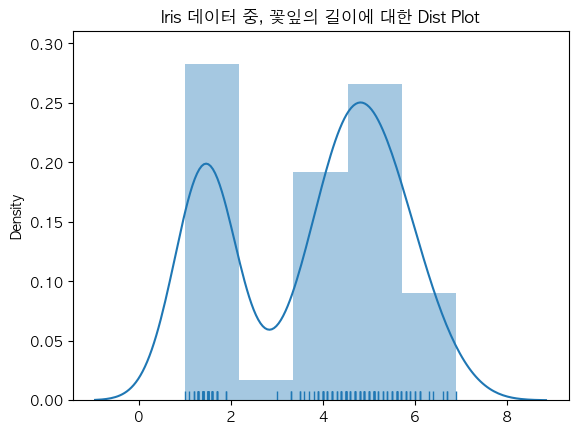

In [ ]:
sns.distplot(x, kde=True, rug=True)
# sns.distplot(x, kde=False, rug=False)

plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

#### 카운트 플롯
countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

countplot: http://seaborn.pydata.org/generated/seaborn.countplot.html

countplot 명령은 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.

In [ ]:
sns.countplot(x="column_name", data=dataframe)

In [ ]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

data 인수에는 대상이 되는 데이터프레임을, x 인수에는 데이터프레임의 열 이름 문자열을 넣는다.

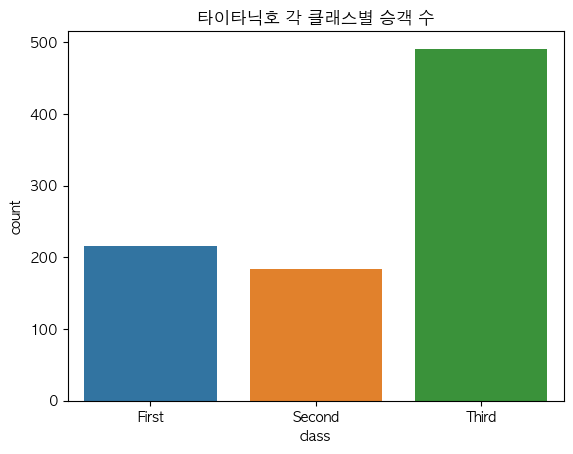

In [ ]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호 각 클래스별 승객 수")
plt.show()

In [ ]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

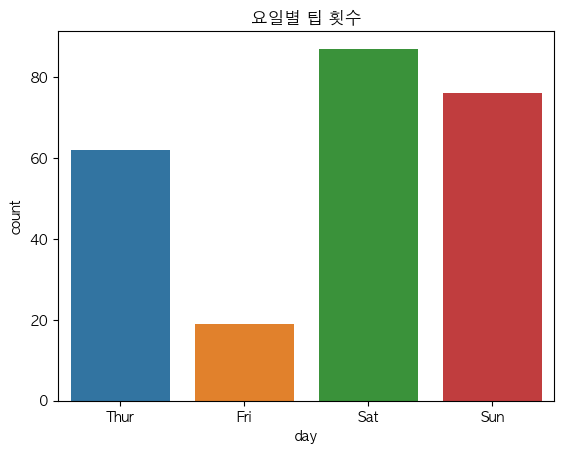

In [ ]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁 횟수")
plt.show()

### 다차원 데이터
데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있을 수 있다.

- 분석하고자 하는 데이터가 모두 실수 값인 경우
- 분석하고자 하는 데이터가 모두 카테고리 값인 경우
- 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

#### 2차원 실수형 데이터
- 데이터가 2차원이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용
- 스캐터 플롯을 그리기 위해서는 Seaborn 패키지의 jointplot 명령을 사용
- jointplot 명령은 스캐터 플롯뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램도 그린다.
- jointplot: http://seaborn.pydata.org/generated/seaborn.jointplot.html
- jointplot 명령도 데이터프레임에만 사용할 수 있다.

In [ ]:
sns.jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')

- data 인수에는 대상이 되는 데이터프레임을,
- x 인수에는 x 변수가 될 데이터프레임의 열 이름 문자열을,
- y 인수에는 y 변수가 될 데이터프레임의 열 이름 문자열을 넣는다.
- kind는 차트의 종류를 지정, kind='scatter'이 스캐터 플롯

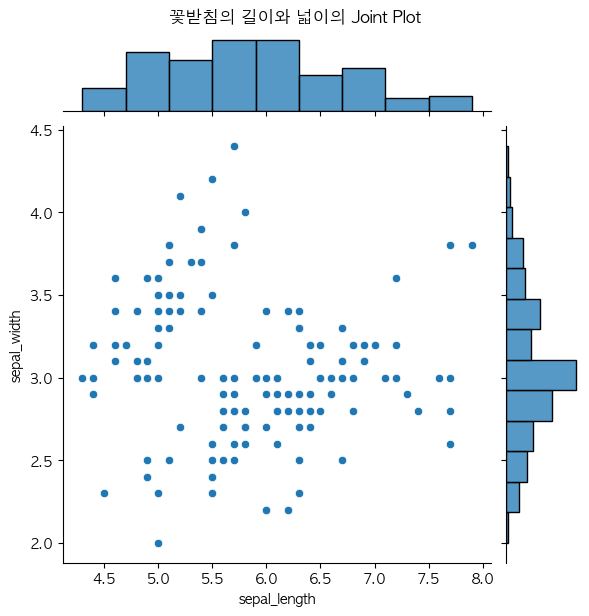

In [ ]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

kind='kde'이면 커널 밀도 히스토그램을 그린다.

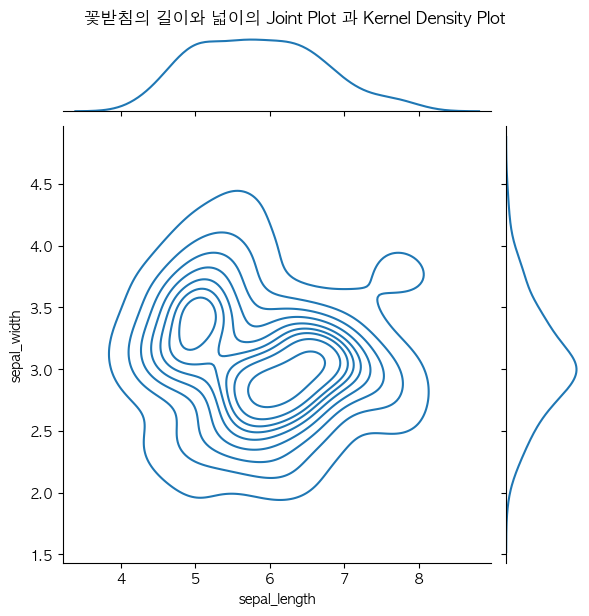

In [ ]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

#### 다차원 실수형 데이터

만약 3차원 이상의 데이터라면 seaborn 패키지의 pairplot 명령을 사용한다. pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다. 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

pairplot: http://seaborn.pydata.org/generated/seaborn.pairplot.html

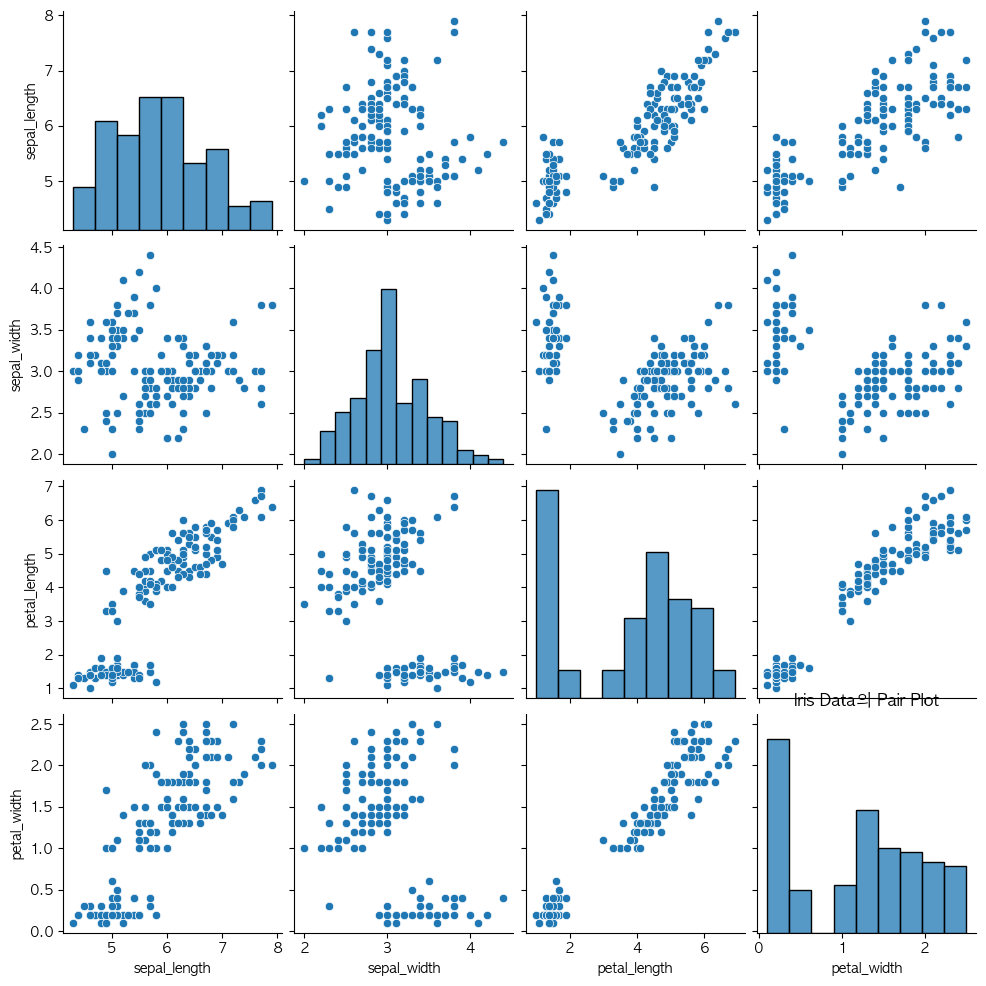

In [ ]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

만약 카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.

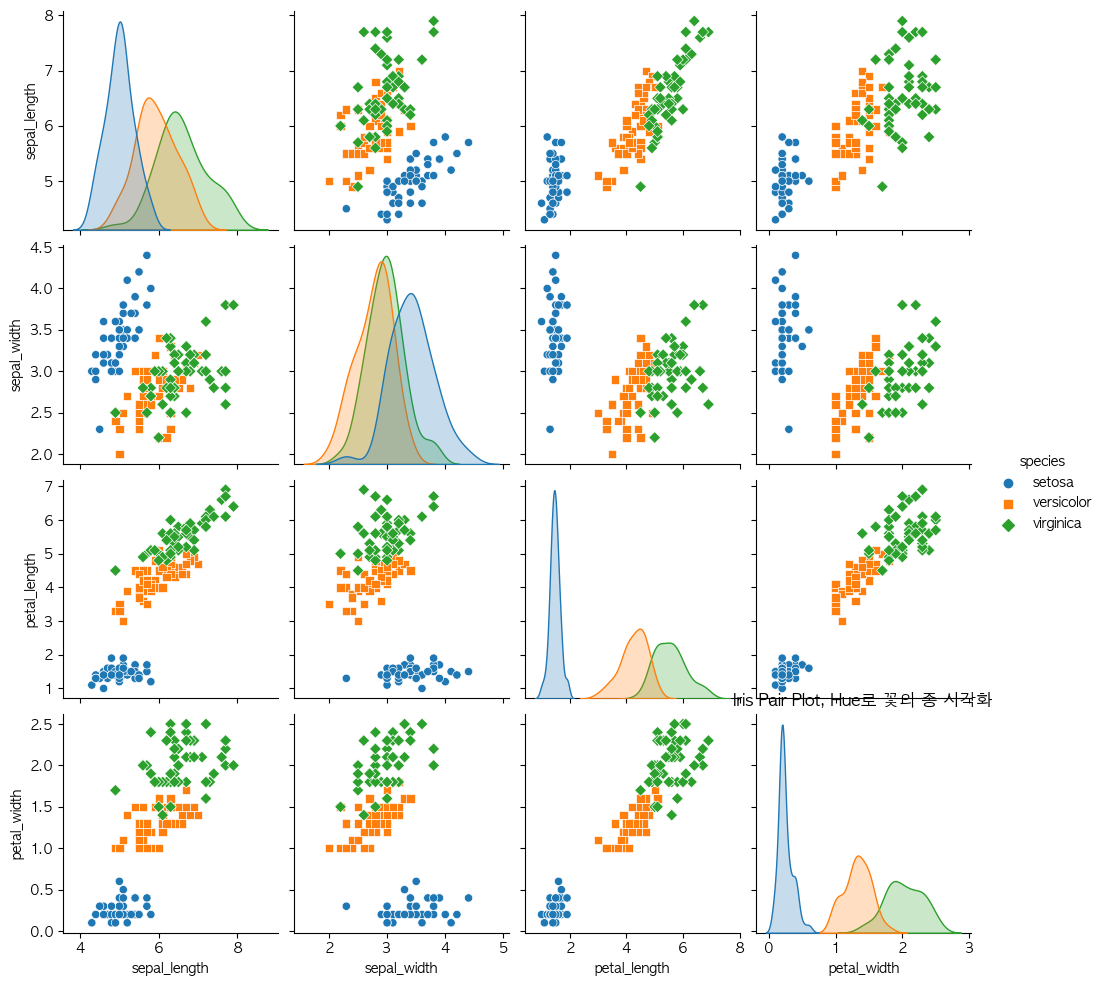

In [ ]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종 시각화")
plt.show()

#### 2차원 카테고리 데이터
만약 데이터가 2차원이고 모든 값이 카테고리 값이면 heatmap 명령을 사용한다.

heatmap: http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex     female  male
class               
First       94   122
Second      76   108
Third      144   347

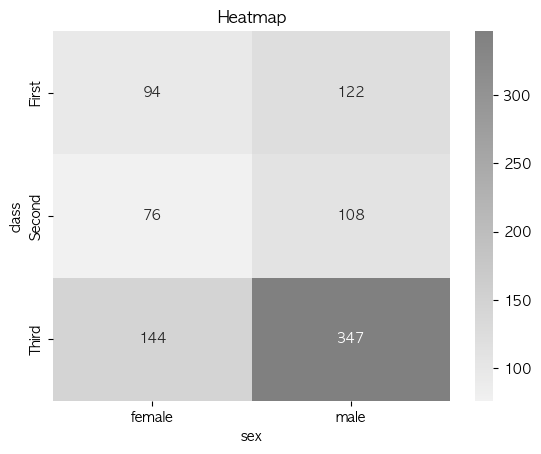

In [ ]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

#### 2차원 복합 데이터
만약 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용할 수 있다.

- barplot
- boxplot
- pointplot
- violinplot
- stripplot
- swarmplot

barplot 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다. 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.

barplot: http://seaborn.pydata.org/generated/seaborn.barplot.html

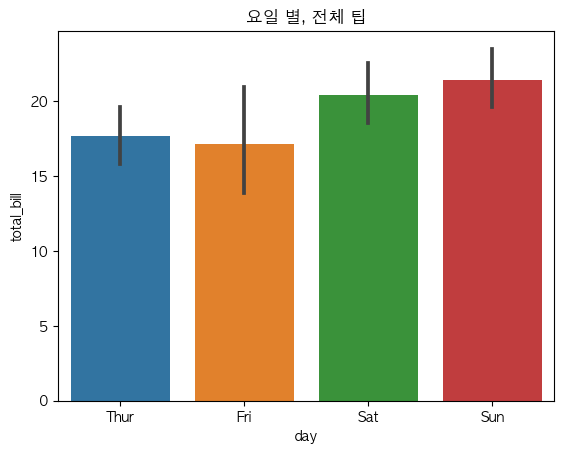

In [ ]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

- boxplot 명령은 박스-휘스커 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 부르는 차트를 그려준다. 박스 플롯은 박스와 박스 바깥의 선(whisker)으로 이루어진다.

- boxplot: http://seaborn.pydata.org/generated/seaborn.boxplot.html

- 박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고 이 3사분위수와 1사분수의 차이(Q3 - Q1)를 IQR(interquartile range)라고 한다.
- 박스 내부의 가로선은 중앙값을 나타낸다.
- 박스 외부의 세로선은 1사분위 수보다 1.5 x IQR 만큼 낮은 값과 3사분위 수보다 1.5 x IQR 만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분이다.
- 그 바깥의 점은 아웃라이어(outlier)라고 부르는데 일일히 점으로 표시한다.

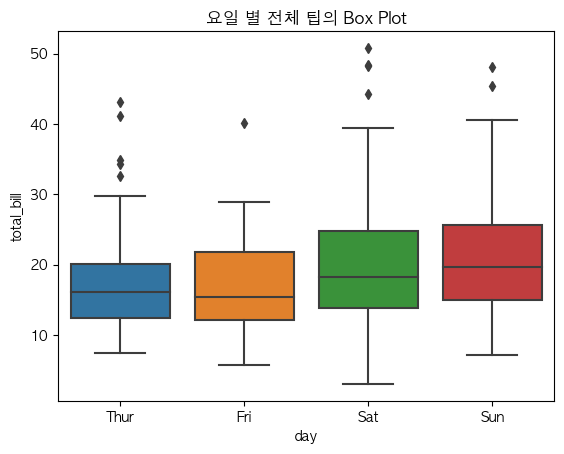

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

boxplot이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주는데 반해 violinplot, stripplot. swarmplot 등은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있다.

violinplot은 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보인다.

violinplot: http://seaborn.pydata.org/generated/seaborn.violinplot.html

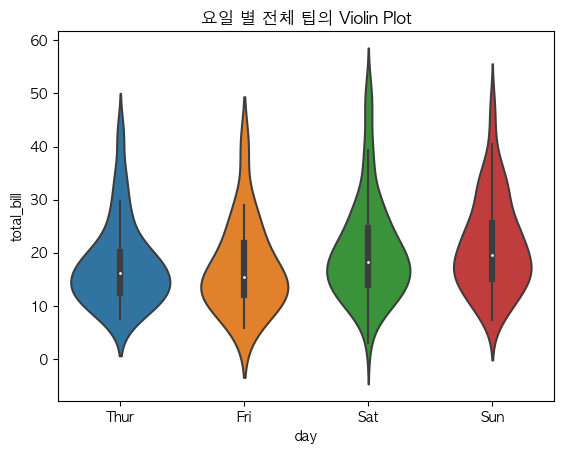

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

stripplot은 마치 스캐터 플롯처럼 모든 데이터를 점으로 그려준다. jitter=True를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 한다.

stripplot: http://seaborn.pydata.org/generated/seaborn.stripplot.html

In [ ]:
import numpy as np

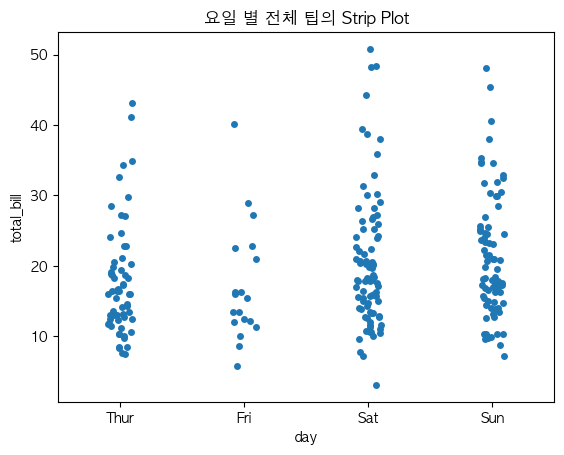

In [ ]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

swarmplot은 stripplot과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동한다.

swarmplot: http://seaborn.pydata.org/generated/seaborn.swarmplot.html

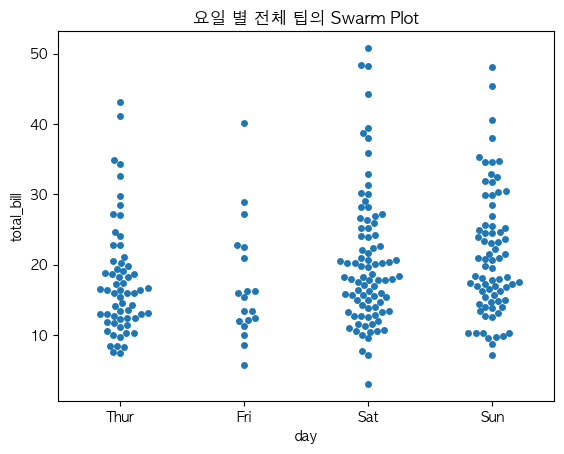

In [ ]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()

### 다차원 복합 데이터
지금까지 소개한 대부분의 명령어에는 2차원 이상의 고차원 데이터에 대해서도 분석할 수 있는 기능이 포함되어 있다.

예를 들어 barplot, violinplot, boxplot 등 에서는 두 가지 카테고리 값에 의한 실수 값의 변화를 보기 위한 hue 인수를 제공한다. hue 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화된다. hue 값이 시각화되는 방법은 플롯의 종류에 따라 다르다.

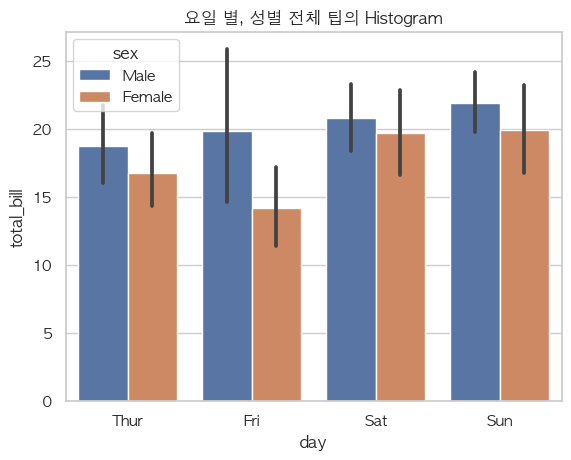

In [ ]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

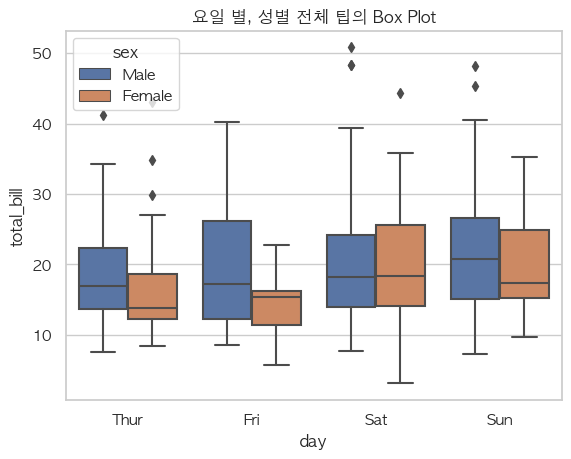

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

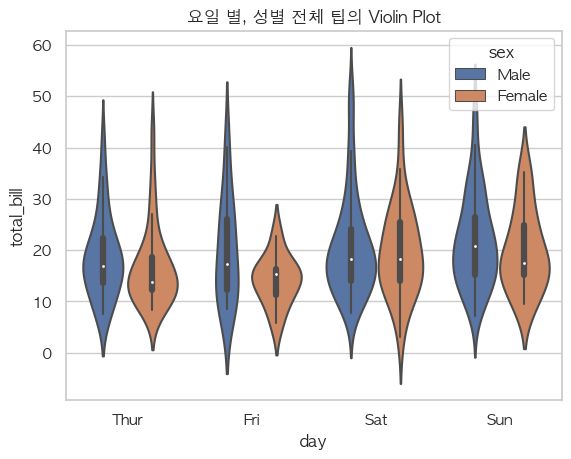

In [ ]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()

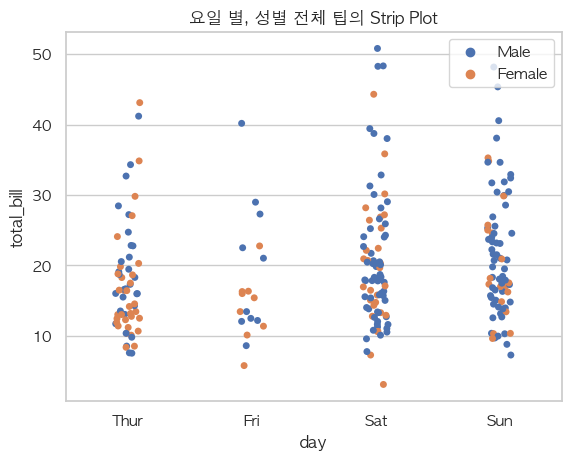

In [ ]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

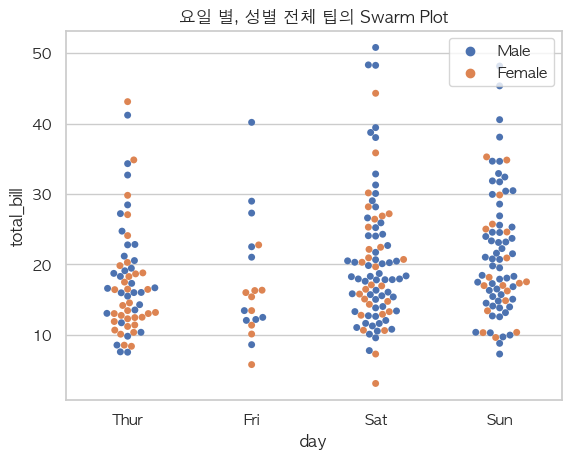

In [ ]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot")
plt.legend(loc=1)
plt.show()

stripplot, violinplot, swarmplot 등 에서는 split 또는 dodge 옵션으로 시각화 방법을 변경할 수도 있다.

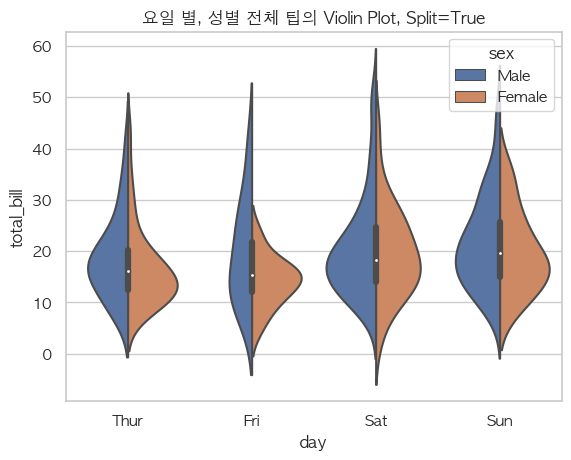

In [ ]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
plt.title("요일 별, 성별 전체 팁의 Violin Plot, Split=True")
plt.show()

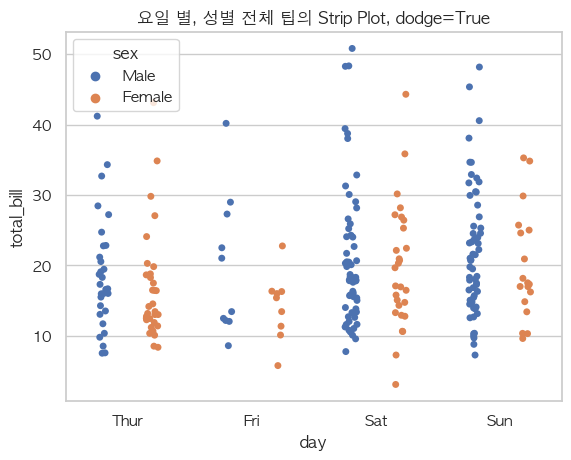

In [ ]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot, dodge=True")
plt.show()

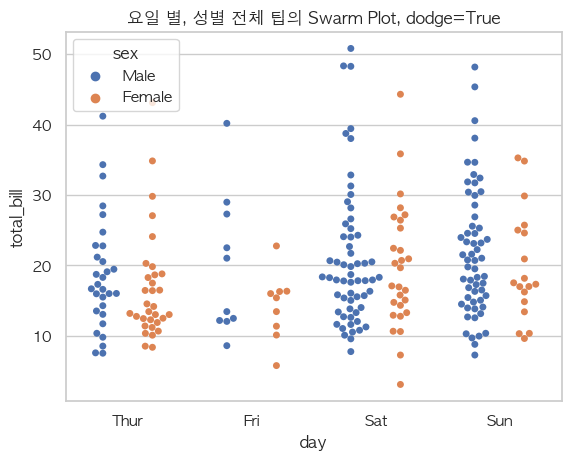

In [ ]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot, dodge=True")
plt.show()

heatmap을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.

heatmap: http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

/var/folders/hx/w1bkm33d5wn9h84_4pjrr6_h0000gn/T/ipykernel_5256/3256965408.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_passengers = flights.pivot("month", "year", "passengers")


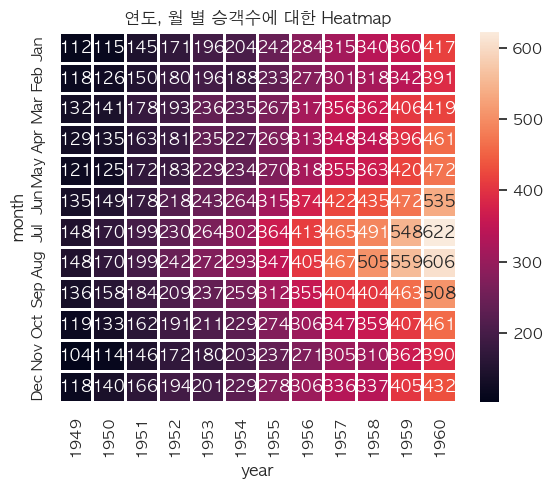

In [ ]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

### catplot
catplot은 색상(hue)과 행(row) 등을 동시에 사용하여 3 개 이상의 카테고리 값에 의한 분포 변화를 보여준다.

catplot: http://seaborn.pydata.org/generated/seaborn.factorplot.html

In [ ]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [ ]:
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


/Users/heeju/.pyenv/versions/3.10.6/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heeju/.pyenv/versions/3.10.6/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heeju/.pyenv/versions/3.10.6/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heeju/.pyenv/versions/3.10.6/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/heeju/.pyenv/versions/3.10.6/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGU

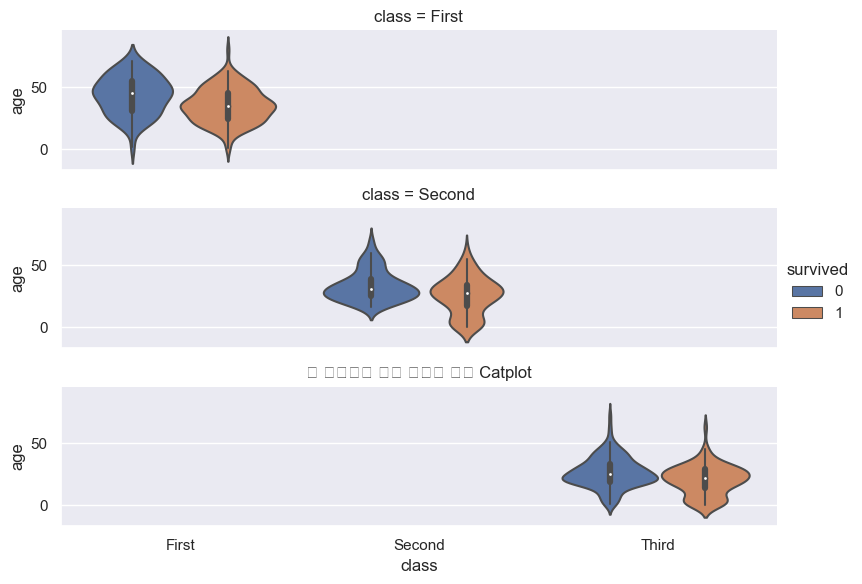

In [ ]:
data = titanic[titanic.survived.notnull()]
# sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
#             kind="violin", split=True, height=2, aspect=4)
sns.catplot(x='class', y='age', hue='survived', row="class", kind='violin', height=2, aspect=4, data=titanic)

plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

#### 기타
시각화 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표시할 수도 있다.

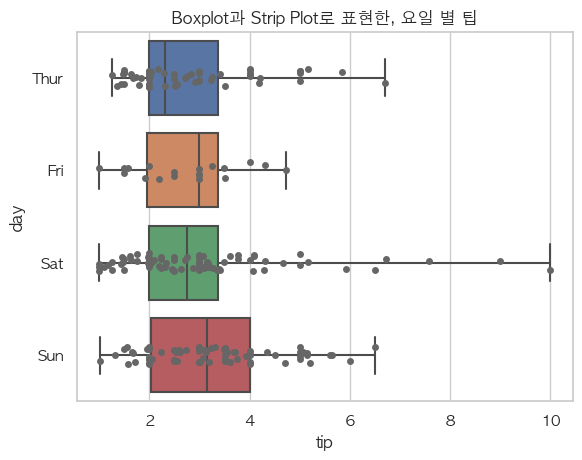

In [ ]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

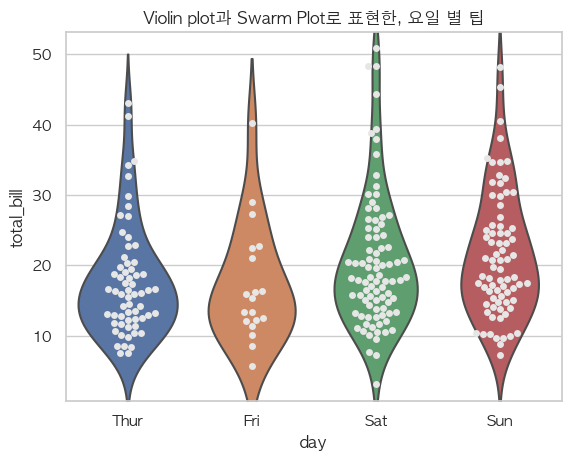

In [ ]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()

### 스타일
- Seaborn을 import하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 바꾼다.
- 따라서 동일한 Matplotlib 명령을 수행해도 Seaborn을 import한 것과 하지 않은 플롯은 모양이 다름
- http://seaborn.pydata.org/tutorial/aesthetics.html
- set 명령으로 색상, 틱 스타일 등 전반적인 플롯 스타일을 Seaborn 기본 스타일로 바꾼다.
- set_style 명령은 틱 스타일만 바꿀 수 있음
- darkgrid, whitegrid, dark, white, ticks 스타일 제공

In [ ]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

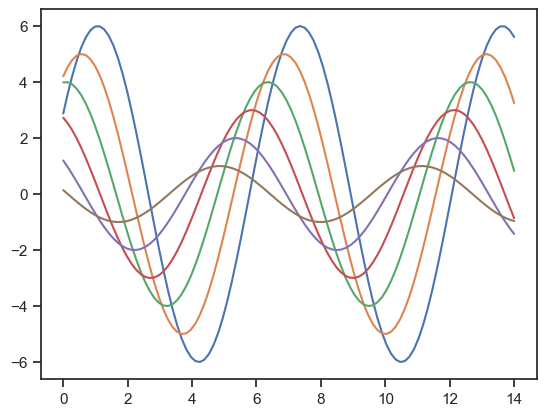

In [ ]:
sns.set_style("ticks")
sinplot()

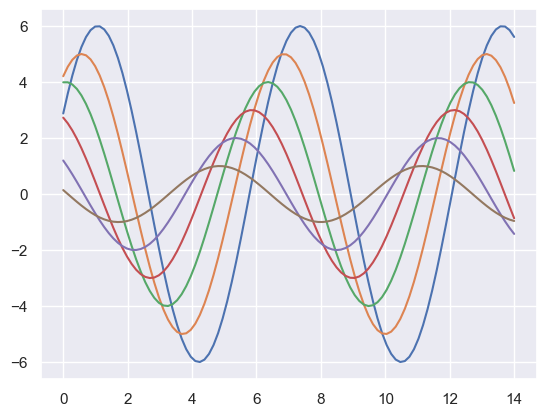

In [ ]:
sns.set_style("darkgrid")
sinplot()

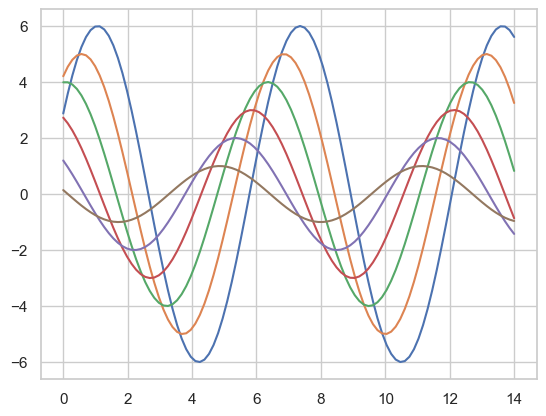

In [ ]:
sns.set_style("whitegrid")
sinplot()

# 요약

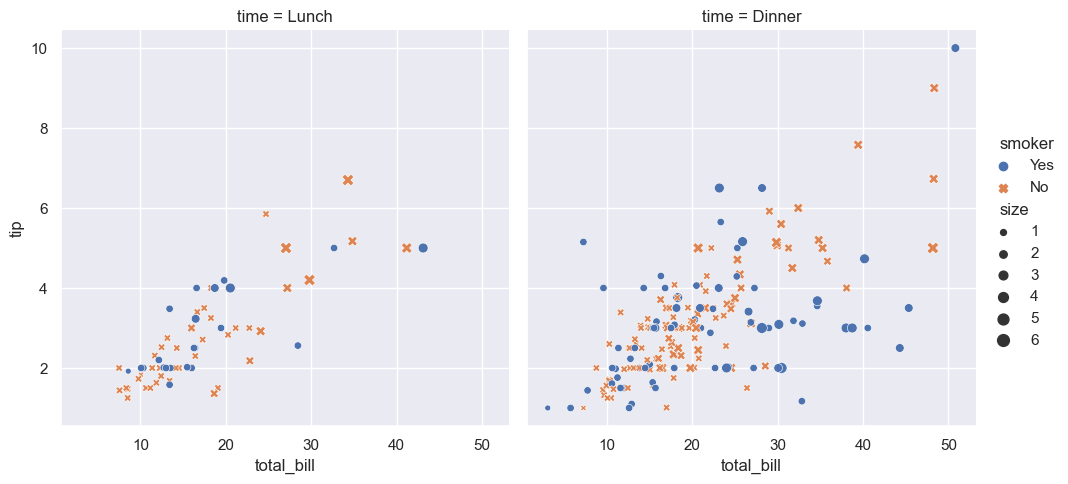

In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips") # pandas dataframe

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
#  the relationship between five variables in the tips dataset

### 통계적 추정과 에러 바

In [ ]:
fmri = sns.load_dataset("fmri")
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

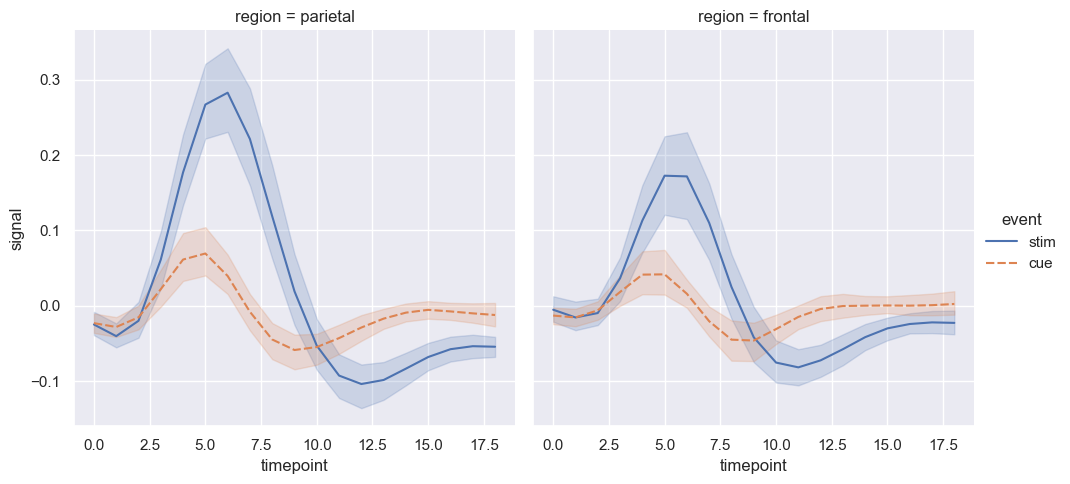

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

### 선형회귀 모델

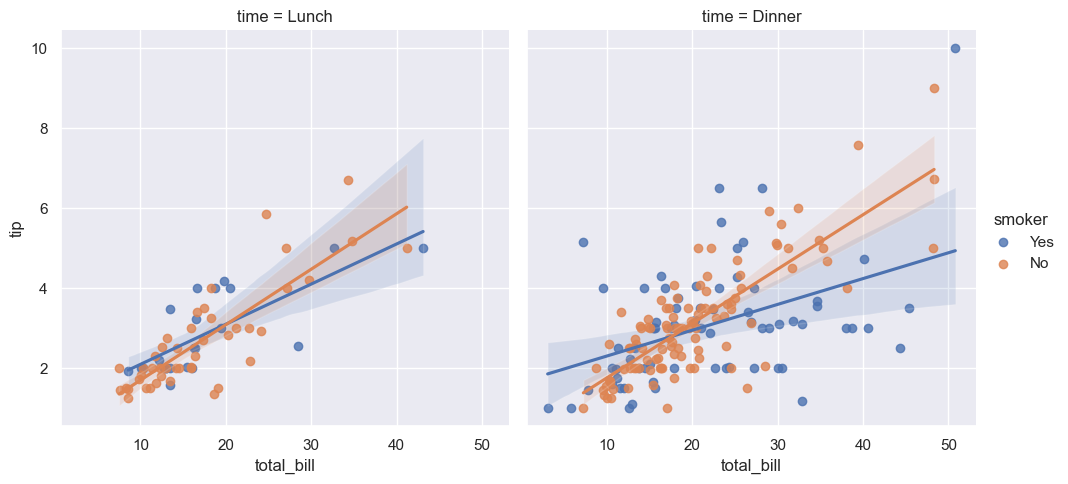

In [ ]:
sns.lmplot(data=tips, x="total_bill",
           y="tip", col="time",
           hue="smoker")

### 유용한 분포 요약
분포를 시각화하는 여러 접근 방식을 지원

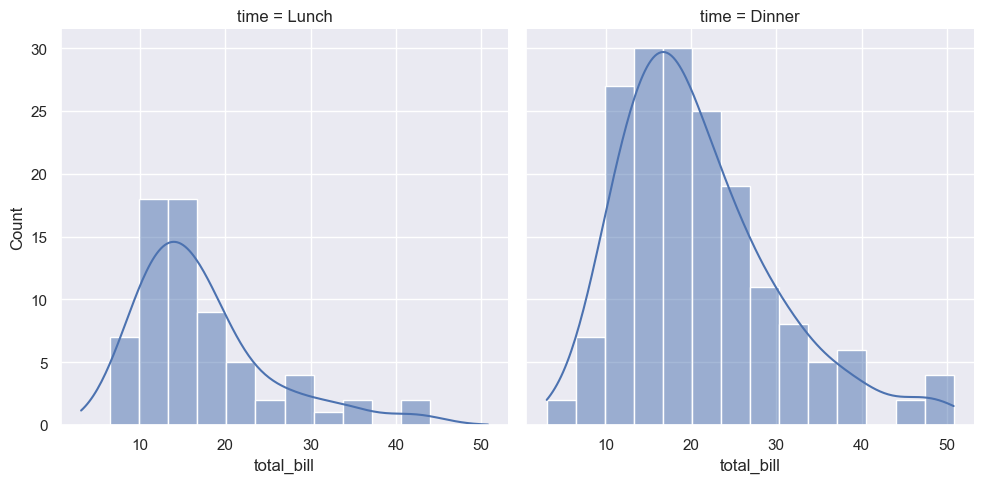

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

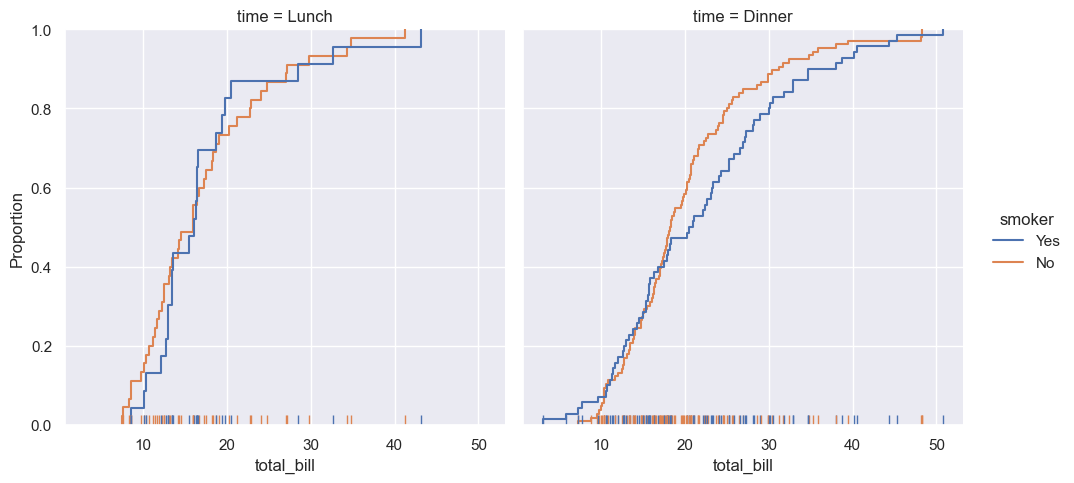

In [ ]:
# 경험적 누적 분포 함수(empirical cumulative distribution function)
sns.displot(data=tips, kind="ecdf", x="total_bill",
            col="time", hue="smoker", rug=True)

### 범주형(categorical) 데이터에 특화된 플롯

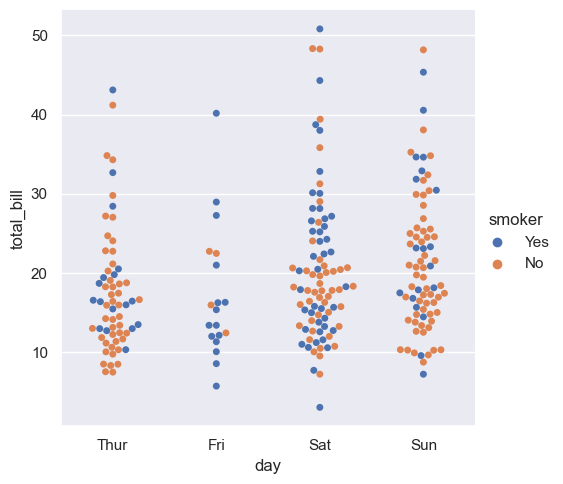

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day",
            y="total_bill", hue="smoker")

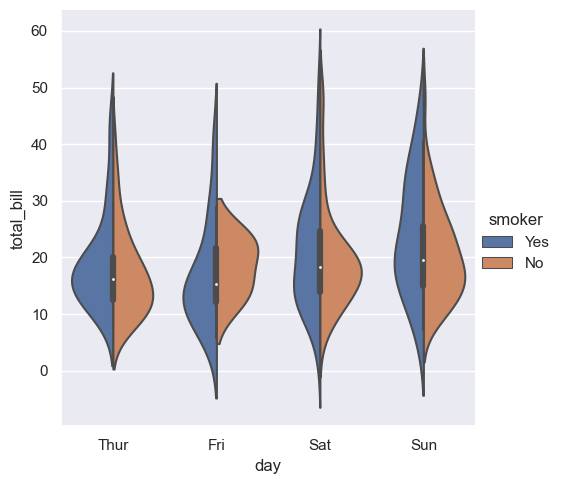

In [ ]:
# # 커널 밀도 추정을 사용하여 포인트가 샘플링되는 기본 분포
# sns.catplot(data=tips, kind="violin", x="day",
#             y="total_bill", hue="smoker", split=True)

### 다변량 데이터셋에서의 복합적 뷰

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

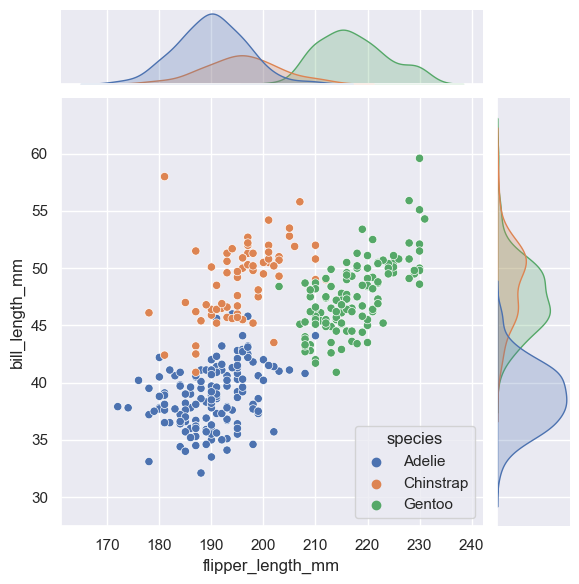

In [ ]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm",
              y="bill_length_mm", hue="species")

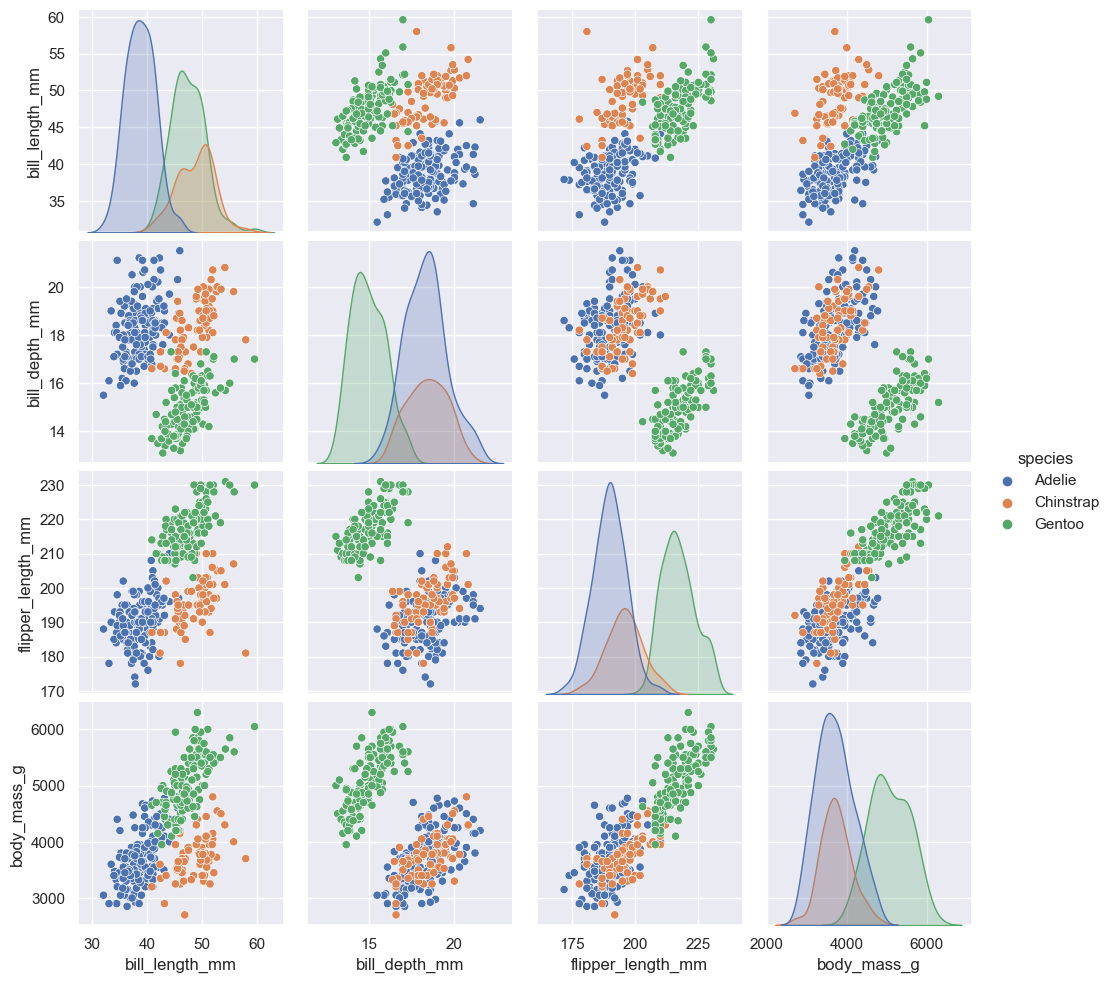

In [ ]:
# 모든 관계와 각 변수에 대한 결합 및 주변 분포
sns.pairplot(data=penguins, hue="species")

/var/folders/hx/w1bkm33d5wn9h84_4pjrr6_h0000gn/T/ipykernel_5256/1129868194.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([0, 1, 2, 3, 4, 5])


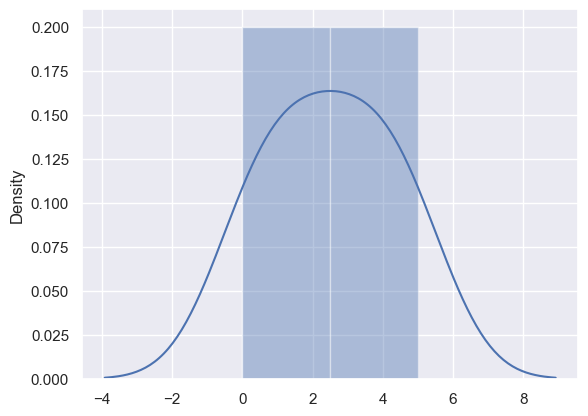

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot([0, 1, 2, 3, 4, 5])

plt.show()

/var/folders/hx/w1bkm33d5wn9h84_4pjrr6_h0000gn/T/ipykernel_5256/2406393504.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([0, 1, 2, 3, 4, 5], hist=False)


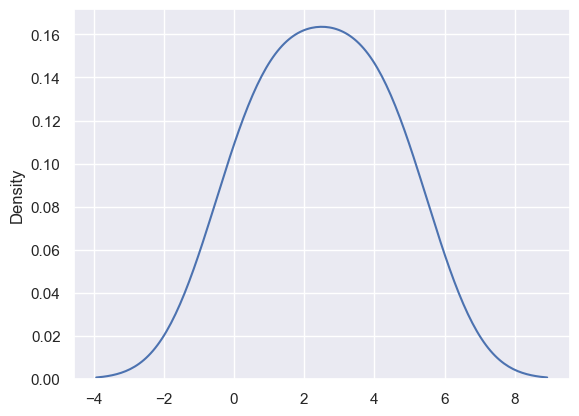

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot([0, 1, 2, 3, 4, 5], hist=False)

plt.show()

# 문제 1
seaborn 라이브러리 내장 flights 데이터를 불러와 데이터 타입을 확인하고, </br>
데이터를 사용해 다양한 그래프를 그려보고 의미를 도출해봅시다.

### 1-1. lineplot 을 사용해 시간에 따른 승객 수를 그려보세요.

In [ ]:
import seaborn as sns

In [ ]:
# load the flights dataset
flights = sns.load_dataset("flights")

In [ ]:
# set plot style
sns.set(style='whitegrid')

<Axes: xlabel='year', ylabel='passengers'>

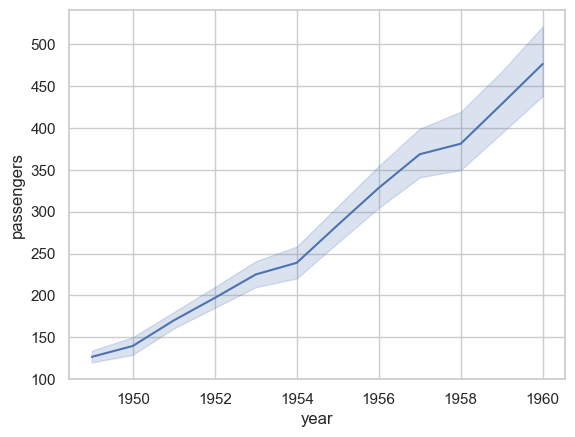

In [ ]:
# plot line plot of the number of passengers over time
sns.lineplot(data=flights, x='year', y='passengers')

### 1-2. 연도 * 월 에 대한 승객 수 heatmap을 그려보세요.

In [ ]:
sns.heatmap(flights, cmap='spring', annot=True, fmt='.0f')

ValueError: could not convert string to float: 'Jan'

In [ ]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [ ]:
pivoted_flights = flights.pivot('month', 'year', 'passengers')
pivoted_flights.head()

/var/folders/hx/w1bkm33d5wn9h84_4pjrr6_h0000gn/T/ipykernel_5256/764364645.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_flights = flights.pivot('month', 'year', 'passengers')


year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472

/var/folders/hx/w1bkm33d5wn9h84_4pjrr6_h0000gn/T/ipykernel_5256/1652353124.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_flights = flights.pivot('month', 'year', 'passengers')


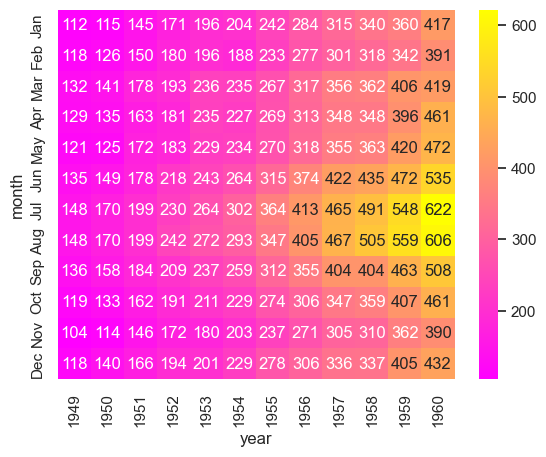

In [ ]:
# plot heatmap of the number of passengers by month and year
pivoted_flights = flights.pivot('month', 'year', 'passengers')
# sns.heatmap(pivoted_flights, annot=True, fmt='d')
# sns.heatmap(pivoted_flights, annot=True, fmt='.2f')
sns.heatmap(pivoted_flights, cmap='spring', annot=True, fmt='.0f')
plt.show()

### 1-3. 연도에 따른 승객 수를 barplot으로 그려보세요.

In [ ]:
flights.groupby('year')['passengers'].sum().reset_index().head()

year  passengers
0  1949        1520
1  1950        1676
2  1951        2042
3  1952        2364
4  1953        2700

In [ ]:
flights.groupby('year')['passengers'].sum().head()

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
Name: passengers, dtype: int64

In [ ]:
flights.groupby('year')['passengers'].sum().reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        12 non-null     int64
 1   passengers  12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [ ]:
flights.groupby('year')['passengers'].sum().info()

<class 'pandas.core.series.Series'>
Int64Index: 12 entries, 1949 to 1960
Series name: passengers
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


<Axes: xlabel='year', ylabel='passengers'>

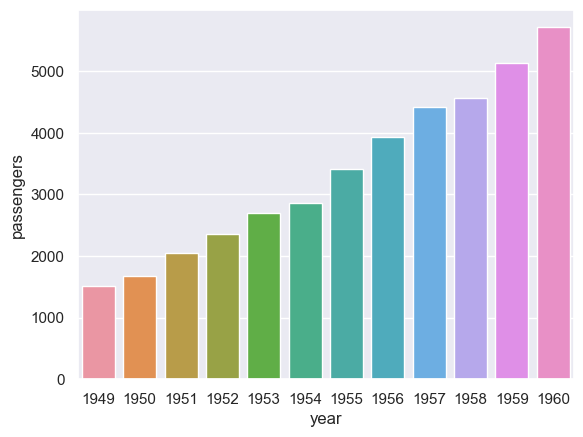

In [ ]:
# plot bar plot of the total number of passengers by year
total_passengers = flights.groupby('year')['passengers'].sum().reset_index()
sns.barplot(data=total_passengers, x='year', y='passengers')

### 1-4. 월별 승객 수를 violinplot으로 나타내보세요.

<Axes: xlabel='month', ylabel='passengers'>

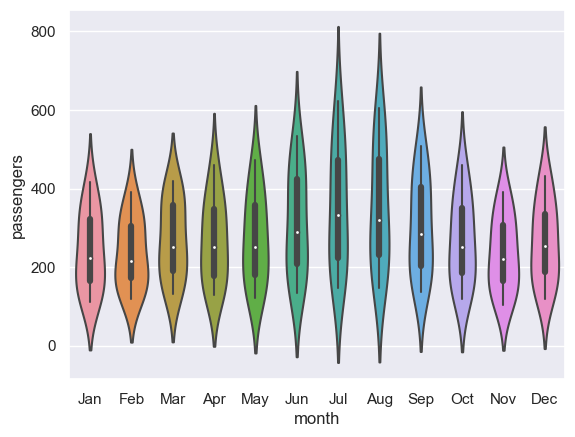

In [ ]:
# plot violin plot of the number of passengers by month
sns.violinplot(data=flights, x='month', y='passengers')

---
# 문제 2
seaborn dataset에서 펭귄 데이터셋을 불러오고 데이터 구성과 기본 정보를 파악해봅시다.  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

In [ ]:
# Display the first few rows of the dataset
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [ ]:
penguins['body_mass_g'].unique()

array([3750., 3800., 3250.,   nan, 3450., 3650., 3625., 4675., 3475.,
       4250., 3300., 3700., 3200., 4400., 4500., 3325., 4200., 3400.,
       3600., 3950., 3550., 3150., 3900., 4150., 4650., 3100., 3000.,
       4600., 3425., 2975., 3500., 4300., 4050., 2900., 2850., 3350.,
       4100., 3050., 4450., 4000., 4700., 4350., 3725., 4725., 3075.,
       2925., 3175., 4775., 3825., 4275., 4075., 3775., 3875., 3275.,
       4475., 3975., 3525., 3575., 4550., 3850., 4800., 2700., 3675.,
       5700., 5400., 5200., 5150., 5550., 5850., 6300., 5350., 5000.,
       5050., 5100., 5650., 5250., 6050., 4950., 4750., 4900., 5300.,
       4850., 5800., 6000., 5950., 4625., 5450., 5600., 4875., 4925.,
       4975., 5500., 4575., 4375., 5750.])

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.isna()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      False   False           False          False              False   
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False            True           True               True   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
339    False   False            True           True               True   
340    False   False           False          False              False   
341    False   False           False          False              False   
342    False   False           False          False              False   
343    False   False           False          False              False   

     body_mass_g    sex  
0          False  False  
1          False  False  
2          False  False  
3           True   True  
4          False  False  
..           ...    ...  
339         True   True  
340        False  False  
341        False  False  
342        False  False  
343        False  False  

[344 rows x 7 columns]

In [ ]:
# Check for missing values
print(penguins.isna().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


### 1-1. 히스토그램을 이용해 펭귄 몸무게 분포를 그리고 xlabel, ylabel, title도 작성해봅시다.

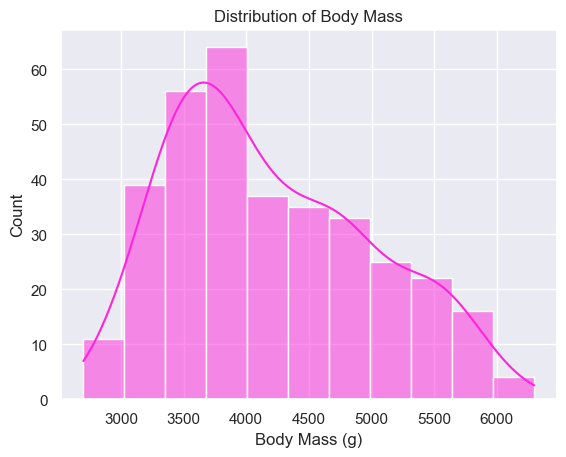

In [ ]:
# Visualize the distribution of the target variable 'body_mass_g'
sns.histplot(data=penguins, x='body_mass_g', kde=True)
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Count')
plt.show()

### 1-2. 부리의 길이와 몸무게의 상관관계를 scatterplot으로 그리고 xlabel, ylabel, title도 표시해봅시다.

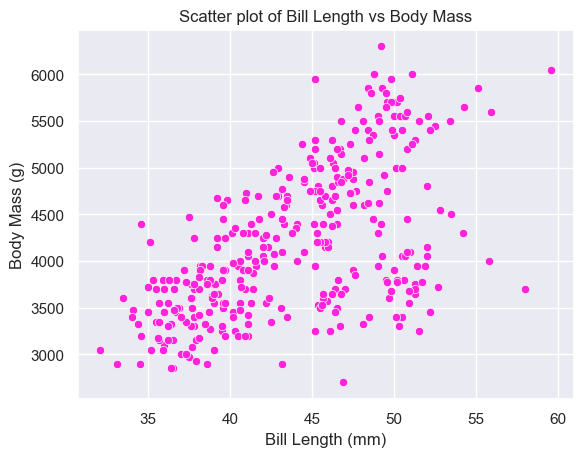

In [ ]:
# Visualize the relationship between two variables using a scatter plot
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g')
plt.title('Scatter plot of Bill Length vs Body Mass')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

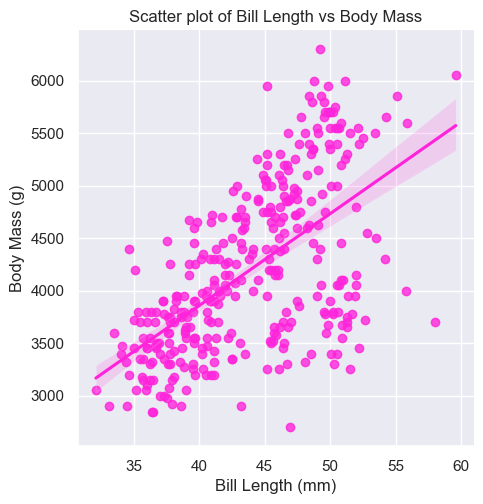

In [ ]:
# 선형회귀로 그린 경우
sns.set_palette('spring')
sns.lmplot(data=penguins, x="bill_length_mm", y="body_mass_g")


plt.title('Scatter plot of Bill Length vs Body Mass')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

### 1-3. 부리의 깊이와 몸무게의 상관관계를 scatterplot으로 그리되 종류별로 다르게 표시하고, xlabel, ylabel, title도 작성해봅시다.

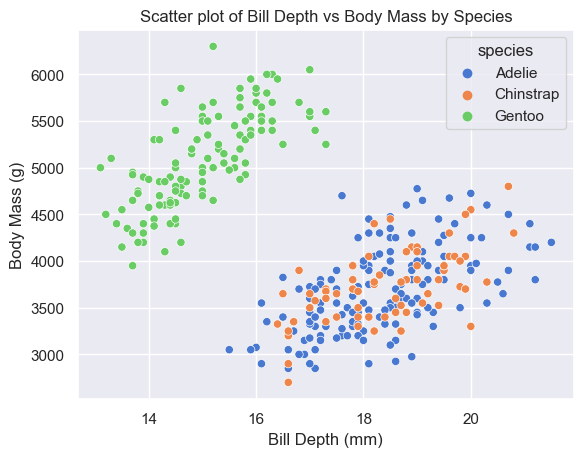

In [ ]:
# Visualize the relationship between three variables using a scatter plot with hue
sns.set_palette('muted')

sns.scatterplot(data=penguins, x='bill_depth_mm', y='body_mass_g', hue='species')
# sns.scatterplot(data=penguins, x='bill_depth_mm', y='body_mass_g')

plt.title('Scatter plot of Bill Depth vs Body Mass by Species')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

### 1-4. 종류별로 구분하여 pairplot을 그리고 어떤 분석 결과를 얻을 수 있는지 생각해봅시다.

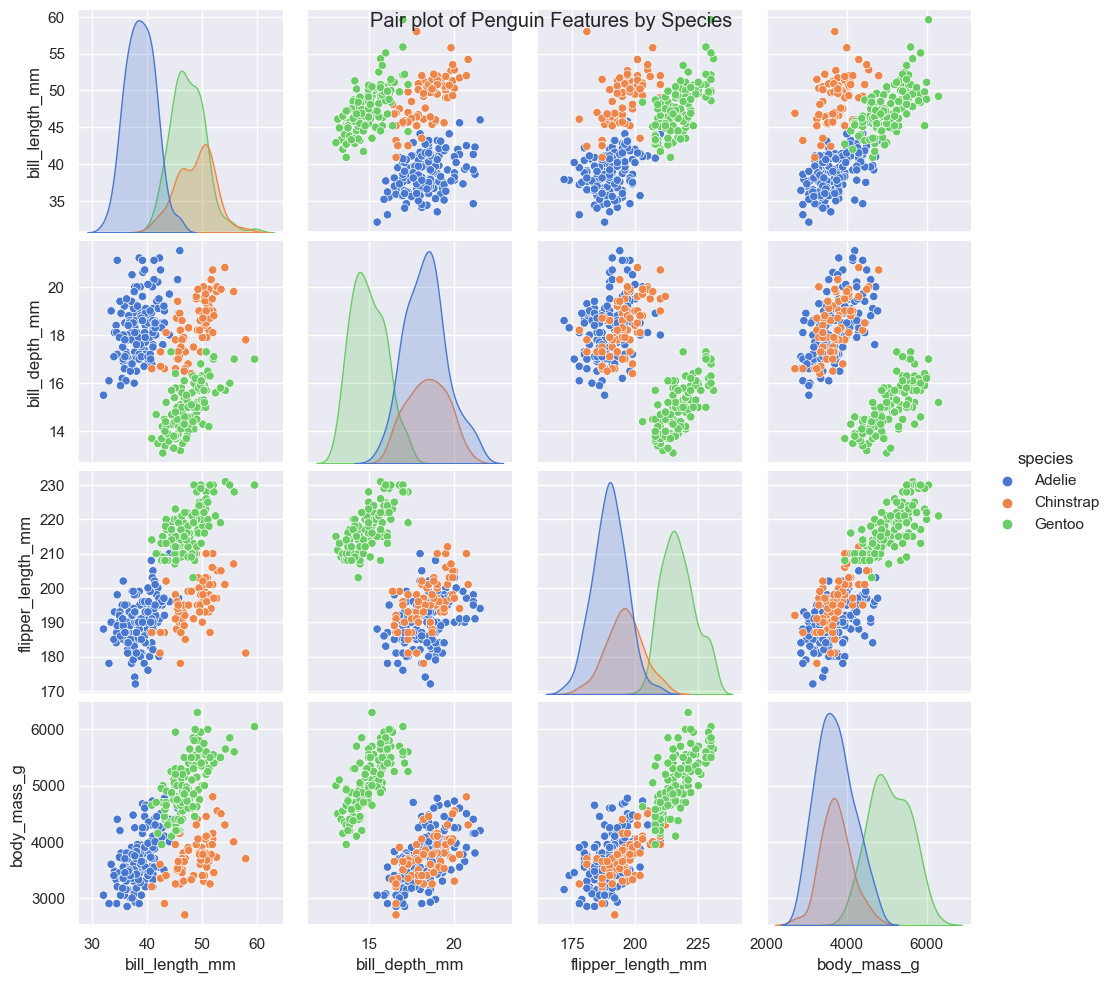

In [ ]:
# Visualize the relationship between multiple variables using a pair plot
sns.set_palette('muted')
sns.pairplot(data=penguins, hue='species')
plt.suptitle('Pair plot of Penguin Features by Species')
plt.show()

/var/folders/hx/w1bkm33d5wn9h84_4pjrr6_h0000gn/T/ipykernel_5256/3360487102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(penguins.corr(), annot=True, cmap='coolwarm')


<Axes: >

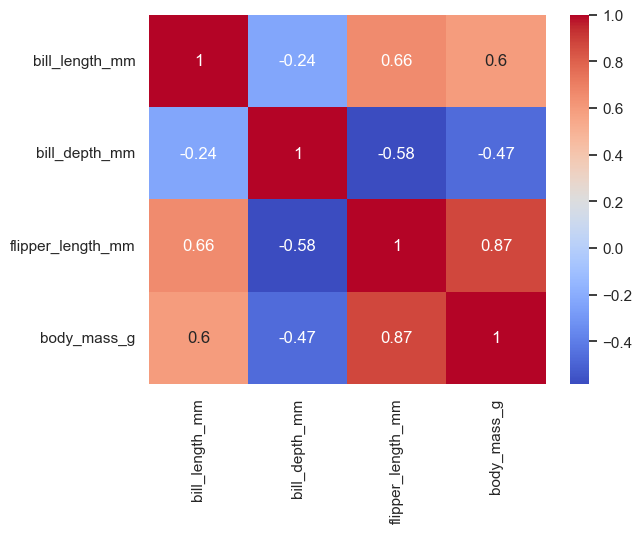

In [ ]:
# 상관계수 (correlation coefficient) heatmap
sns.heatmap(penguins.corr(), annot=True, cmap='coolwarm')